In [41]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

In [42]:
import pandas as pd
flights = pd.read_csv("C:/Users/jackl/Downloads/FlightDelays.csv")

In [43]:
flights.shape

(2201, 13)

In [44]:
flights.DAY_WEEK = flights.DAY_WEEK.astype('category')

flights.CRS_DEP_TIME = [round(t / 100) for t in flights.CRS_DEP_TIME]
flights.CRS_DEP_TIME = flights.CRS_DEP_TIME.astype('category')

flights['isDelayed'] = [1 if status == 'delayed' else 0 for status in flights['Flight Status']]

flights

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status,isDelayed
0,15,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime,0
1,16,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime,0
2,12,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime,0
3,17,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime,0
4,10,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,6,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime,0
2197,17,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime,0
2198,16,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime,0
2199,14,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime,0


In [45]:
predictors = ['DAY_WEEK', 'CRS_DEP_TIME', 'ORIGIN', 'DEST', 'CARRIER', 'Weather']
outcome = 'isDelayed'

X = pd.get_dummies(flights[predictors], drop_first=True)
y = flights[outcome]
classes = ['ontime', 'delayed']

In [46]:
X

,Weather,DAY_WEEK_2,DAY_WEEK_3,DAY_WEEK_4,DAY_WEEK_5,DAY_WEEK_6,DAY_WEEK_7,CRS_DEP_TIME_7,CRS_DEP_TIME_8,CRS_DEP_TIME_9,...,ORIGIN_IAD,DEST_JFK,DEST_LGA,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_OH,CARRIER_RU,CARRIER_UA,CARRIER_US
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2197,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2198,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2199,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [47]:
from sklearn import preprocessing 
scalar = preprocessing.StandardScaler()
X_standardized = scalar.fit_transform(X)
X_standardized


array([[-0.12146334, -0.40260503, -0.41245882, ..., -0.47702368,
        -0.11952286, -0.47415097],
       [-0.12146334, -0.40260503, -0.41245882, ..., -0.47702368,
        -0.11952286, -0.47415097],
       [-0.12146334, -0.40260503, -0.41245882, ..., -0.47702368,
        -0.11952286, -0.47415097],
       ...,
       [-0.12146334, -0.40260503, -0.41245882, ...,  2.096332  ,
        -0.11952286, -0.47415097],
       [-0.12146334, -0.40260503, -0.41245882, ...,  2.096332  ,
        -0.11952286, -0.47415097],
       [-0.12146334, -0.40260503, -0.41245882, ...,  2.096332  ,
        -0.11952286, -0.47415097]])

In [48]:
#Here we encode the predictor, ontime would be 1 and delayed would be 0
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(flights['Flight Status'])
y

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.40, random_state=0)

In [51]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [52]:
coef = pd.DataFrame(logreg.coef_[0], index = X.columns,columns=['Coefficients'])
coef

,Coefficients
Weather,-0.809328
DAY_WEEK_2,0.232601
DAY_WEEK_3,0.171324
DAY_WEEK_4,0.314437
DAY_WEEK_5,0.104437
DAY_WEEK_6,0.369826
DAY_WEEK_7,-0.062108
CRS_DEP_TIME_7,0.138851
CRS_DEP_TIME_8,0.027752
CRS_DEP_TIME_9,0.094768


In [53]:
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_[0]), index = X.columns,columns = ['Odds'])
df.sort_values(by=['Odds'], ascending = True)

,Odds
Weather,0.445157
CRS_DEP_TIME_15,0.787547
CRS_DEP_TIME_19,0.800435
CRS_DEP_TIME_17,0.844127
CRS_DEP_TIME_21,0.882663
CRS_DEP_TIME_20,0.895638
DAY_WEEK_7,0.939781
CRS_DEP_TIME_14,0.951818
CRS_DEP_TIME_16,0.954363
CRS_DEP_TIME_12,1.015244


In [54]:
y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [55]:
#accuracy as one evaluation metrics
from sklearn import metrics
print("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy::0.815


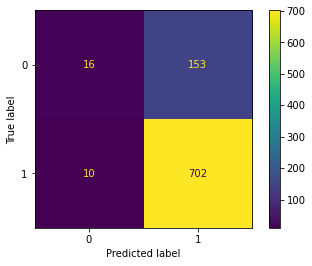

In [56]:
# interpret confuison matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.09      0.16       169
           1       0.82      0.99      0.90       712

    accuracy                           0.81       881
   macro avg       0.72      0.54      0.53       881
weighted avg       0.78      0.81      0.76       881



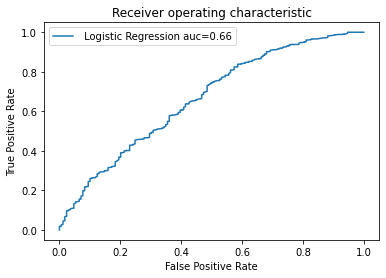

In [58]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Logistic Regression auc="+str(auc.round(2)))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc=4)
# show the legend
pyplot.legend()
plt.show()